In [35]:
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("stockprices.csv",parse_dates=True)

In [38]:
df.shape

(6295, 7)

In [39]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6295 entries, 0 to 6294
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6295 non-null   object 
 1   open    6295 non-null   float64
 2   high    6295 non-null   float64
 3   low     6295 non-null   float64
 4   close   6295 non-null   float64
 5   volume  6295 non-null   int64  
 6   Name    6295 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 344.4+ KB


How did the closing stockprice of the below 5 companies, vary over time?

In [41]:
df['date'] = pd.to_datetime(df['date'])

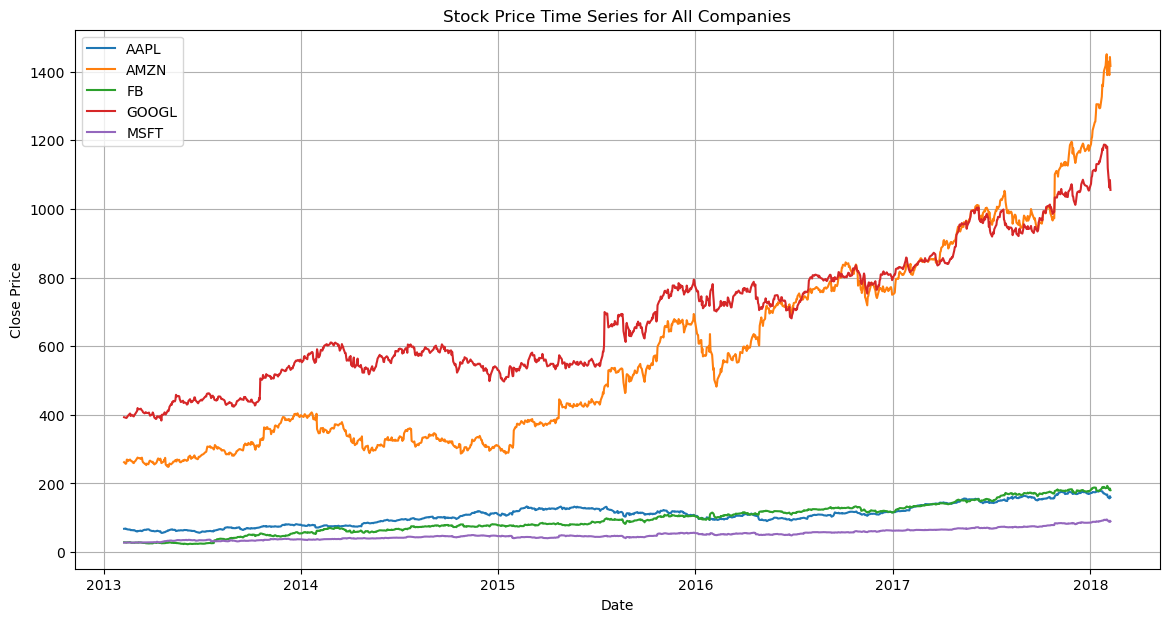

In [42]:

# Set 'date' as index
df.set_index('date', inplace=True)

# Get a list of all unique company names
companies = df['Name'].unique()

# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

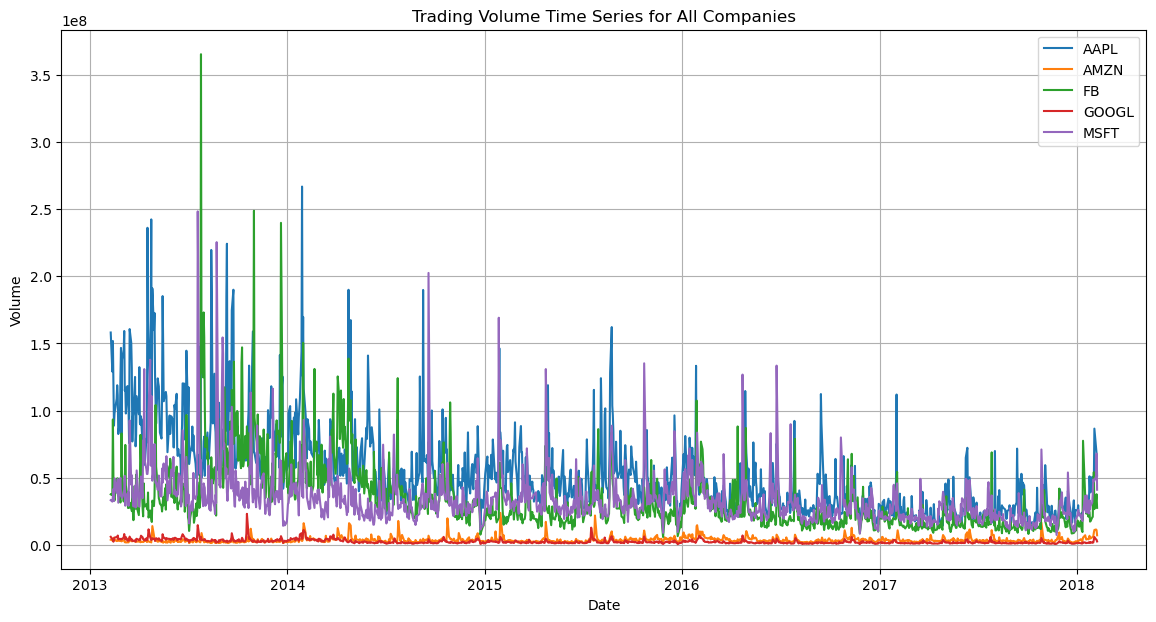

In [43]:
plt.figure(figsize=(14, 7))

# Plot the trading volume for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['volume'], label=company)

# Customize the plot
plt.title('Trading Volume Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

plt.show()


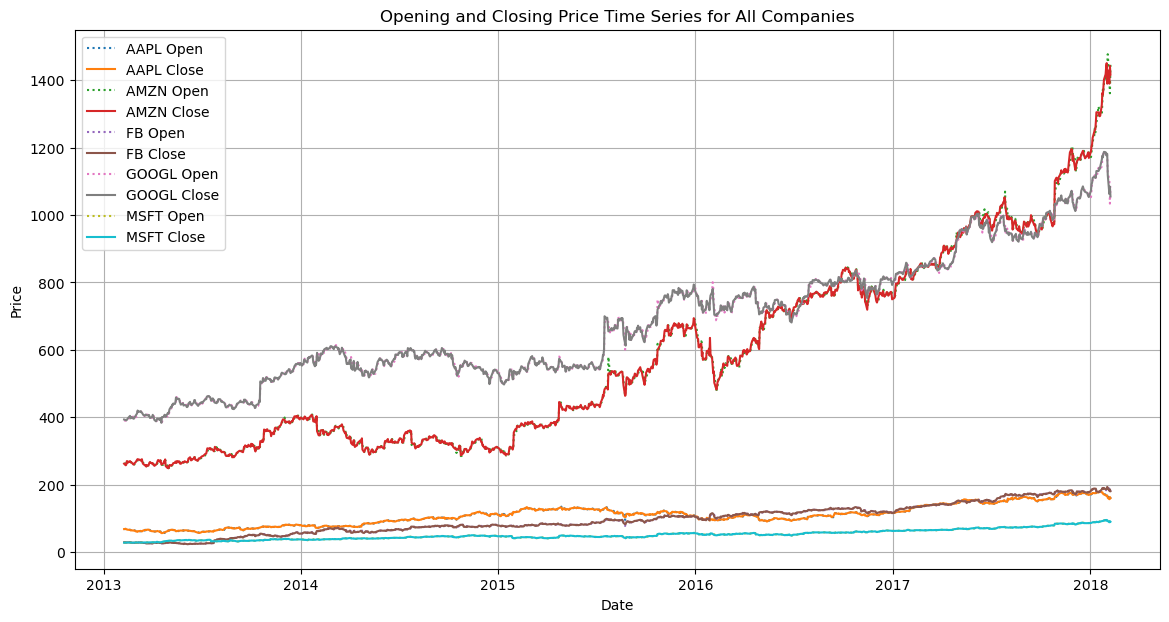

In [44]:
# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the opening and closing prices for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['open'], label=f'{company} Open', linestyle='dotted')
    plt.plot(df_company.index, df_company['close'], label=f'{company} Close')

# Customize the plot
plt.title('Opening and Closing Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

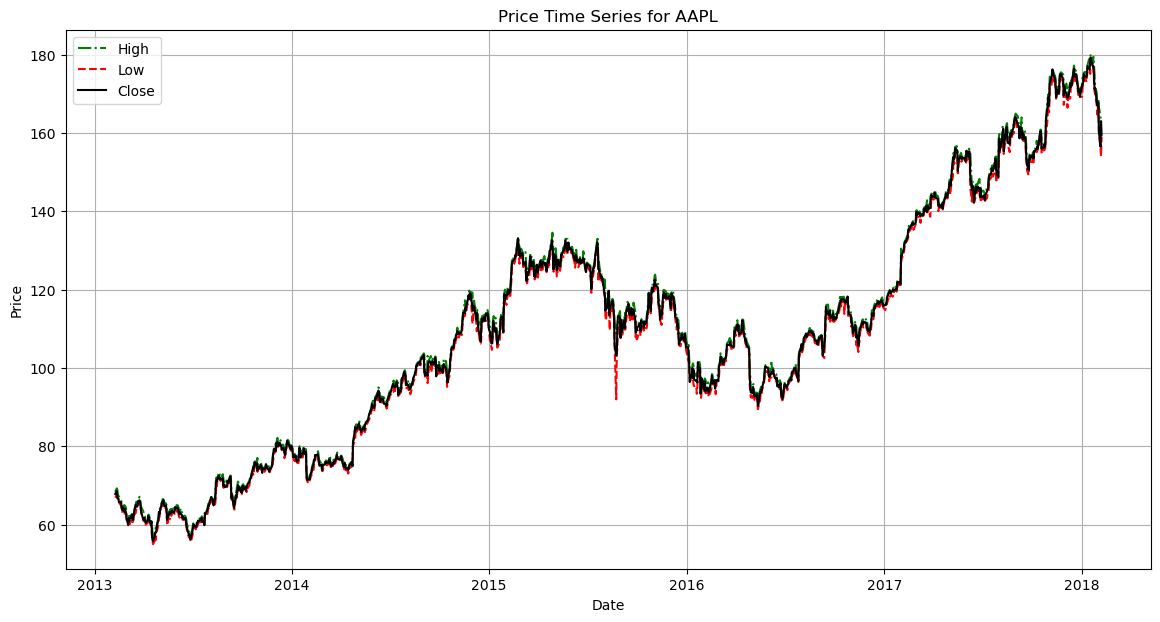

In [45]:
# Filter the data for a specific company
company_name = 'AAPL'
df_company = df[df['Name'] == company_name]

# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the opening, high, low, and closing prices for the company
#plt.plot(df_company.index, df_company['open'], label='Open', linestyle='dotted', color='blue')
plt.plot(df_company.index, df_company['high'], label='High', linestyle='dashdot', color='green')
plt.plot(df_company.index, df_company['low'], label='Low', linestyle='dashed', color='red')
plt.plot(df_company.index, df_company['close'], label='Close', linestyle='solid', color='black')

# Customize the plot
plt.title(f'Price Time Series for {company_name}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

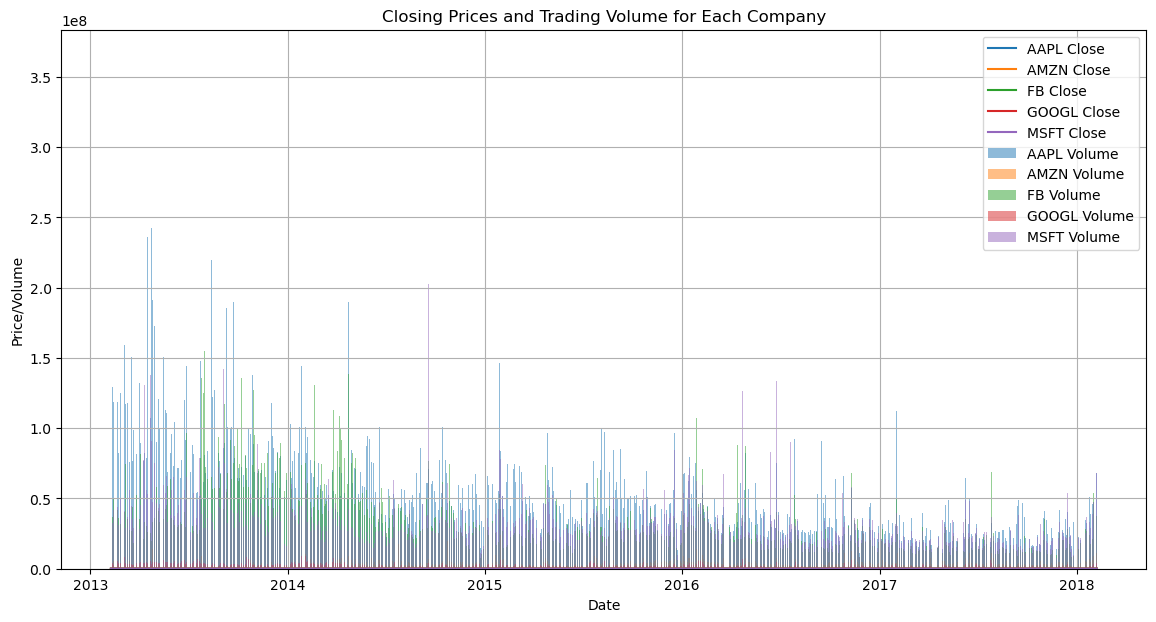

In [46]:
# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing prices and trading volumes for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=f'{company} Close')
    plt.bar(df_company.index, df_company['volume'], label=f'{company} Volume', alpha=0.5)

# Customize the plot
plt.title('Closing Prices and Trading Volume for Each Company')
plt.xlabel('Date')
plt.ylabel('Price/Volume')
plt.legend()
plt.grid(True)
plt.show()

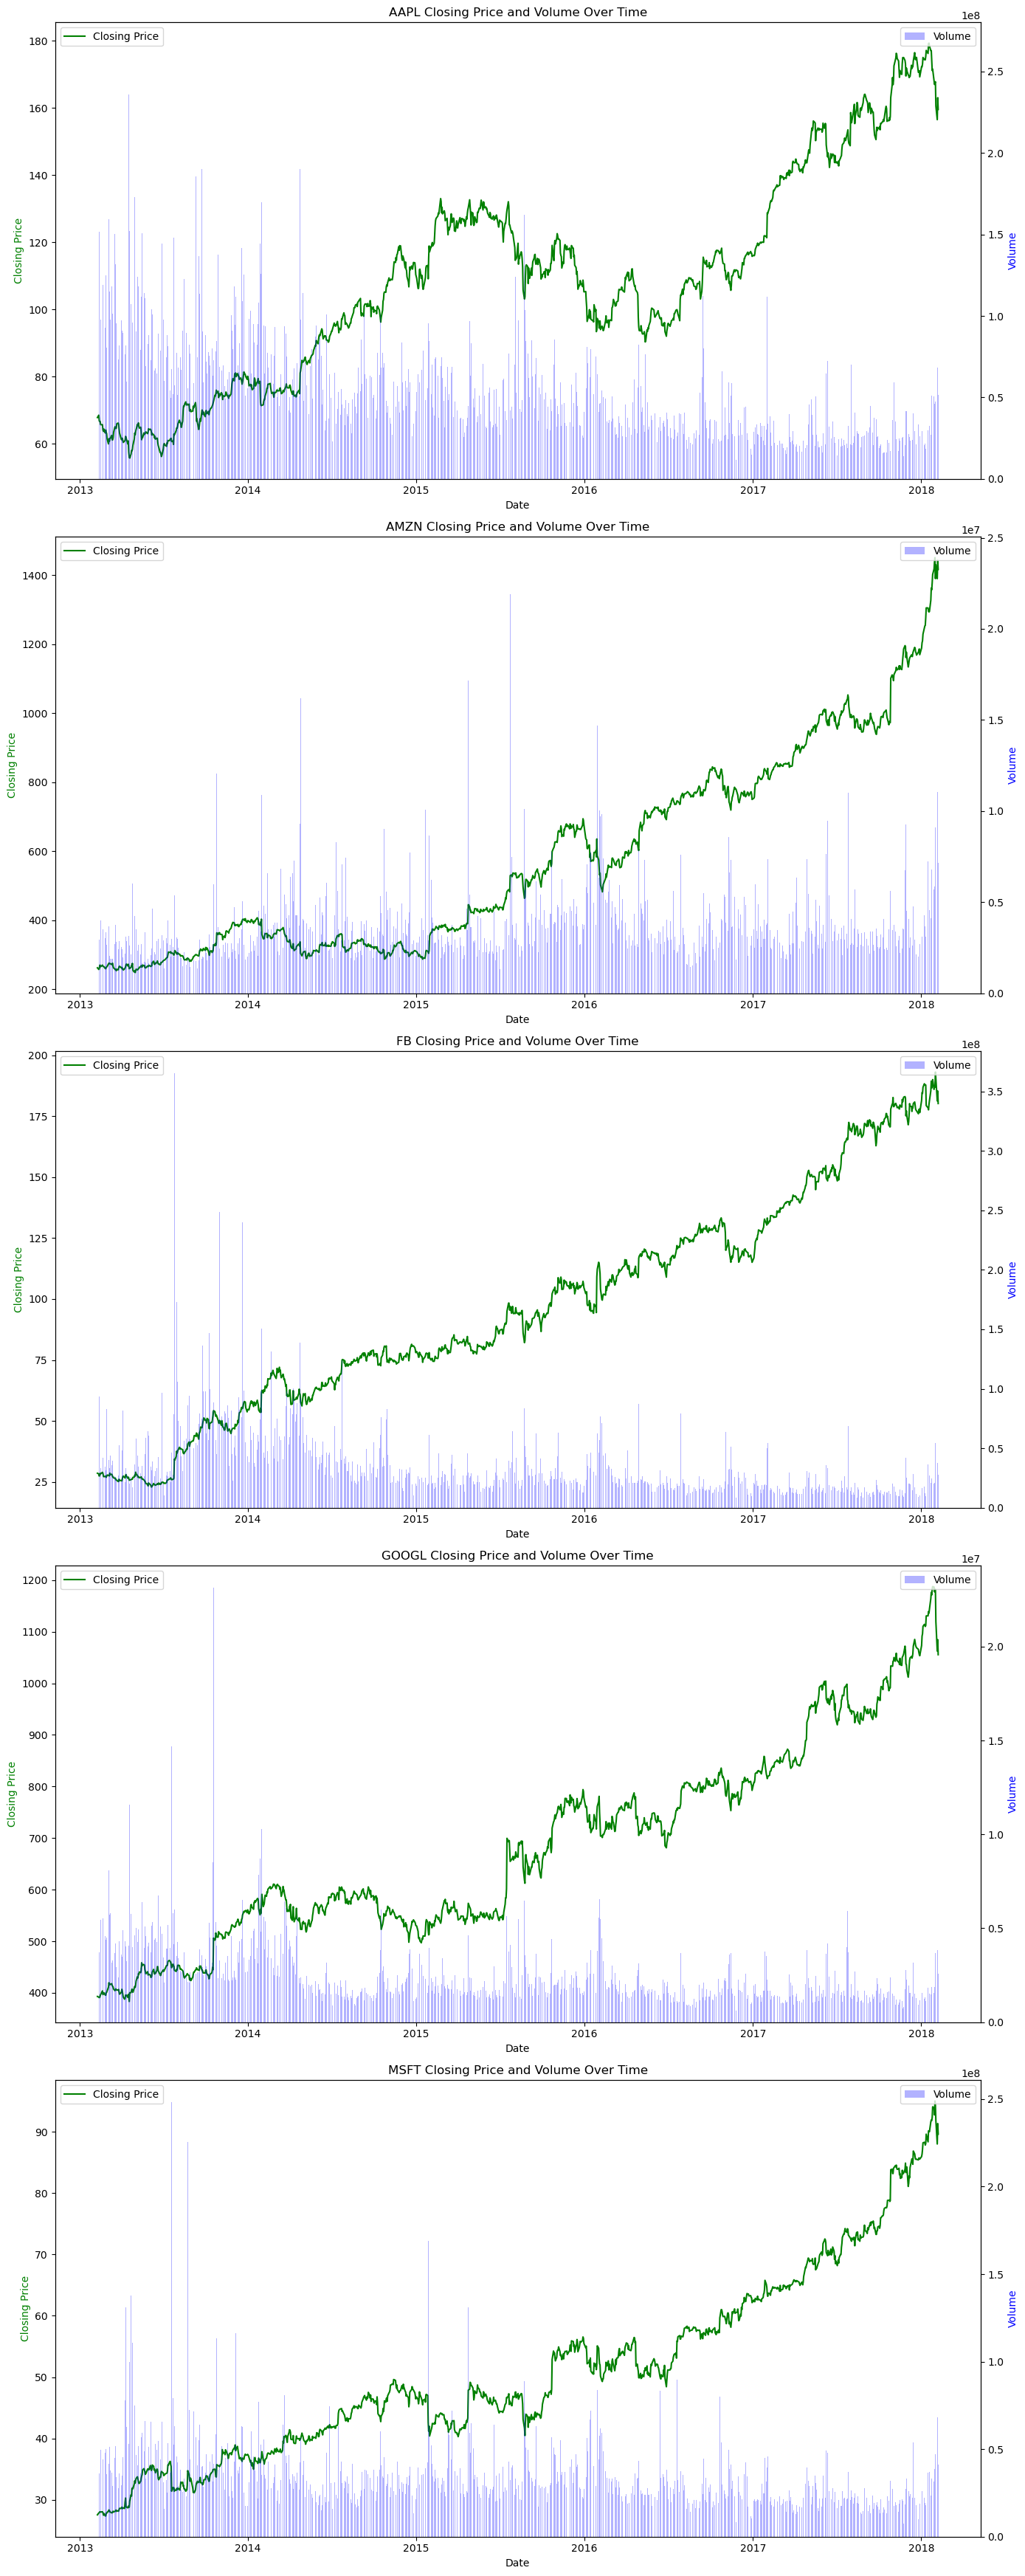

In [47]:
fig, axes = plt.subplots(nrows=len(companies), ncols=1, figsize=(14, 7*len(companies)))
for i, company in enumerate(companies):
    company_data = df[df['Name'] == company]
    
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    ax1.plot(company_data.index, company_data['close'], 'g-', label='Closing Price')
    ax2.bar(company_data.index, company_data['volume'], alpha=0.3, color='b', label='Volume')

    ax1.set_title(f'{company} Closing Price and Volume Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color='g')
    ax2.set_ylabel('Volume', color='b')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [48]:
df["Name"].unique()

array(['AAPL', 'AMZN', 'FB', 'GOOGL', 'MSFT'], dtype=object)

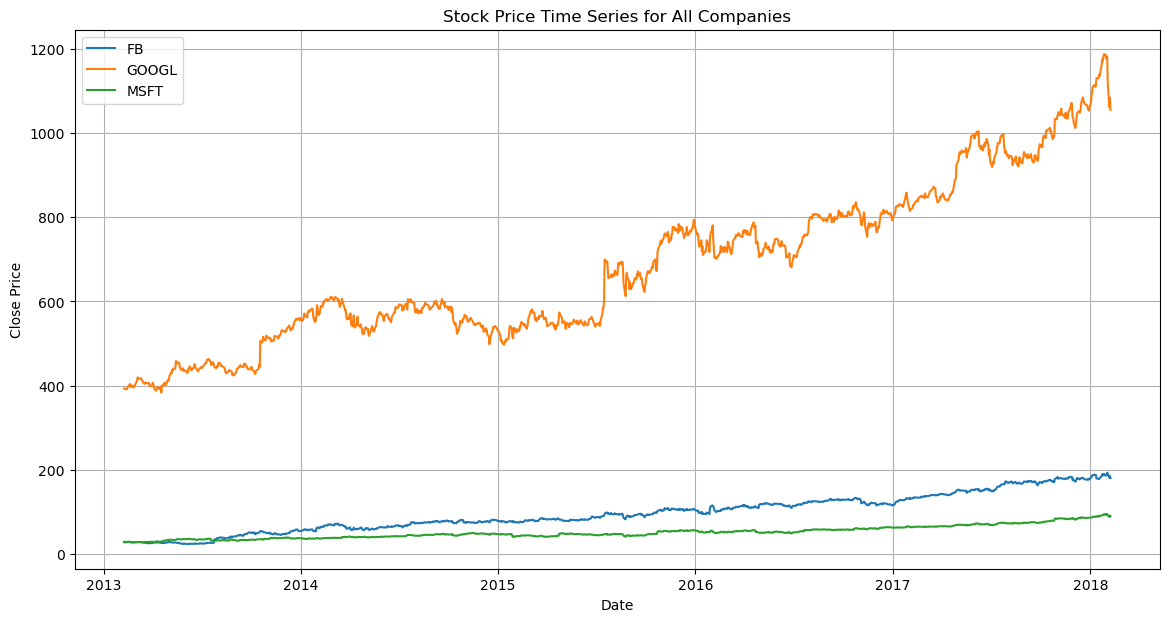

In [49]:

# Get a list of all unique company names
companies = ['FB', 'GOOGL', 'MSFT']

# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

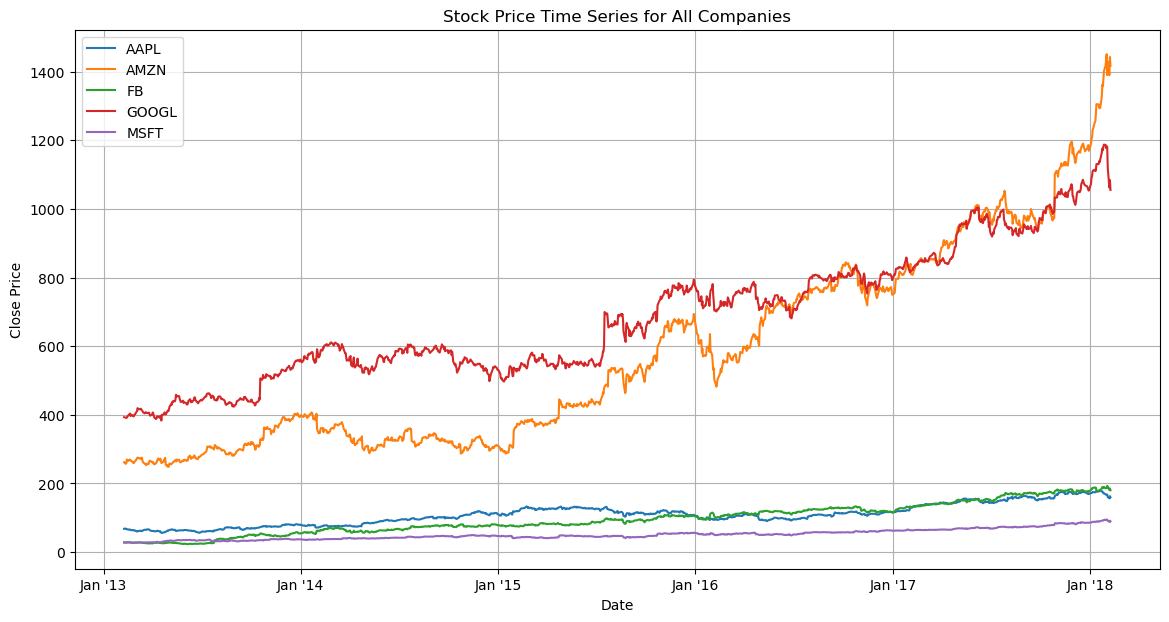

In [50]:

from matplotlib.dates import DateFormatter
# Get a list of all unique company names
companies = df['Name'].unique()

# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Format x-axis to show month and year
date_format = DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.grid(True)
plt.show()

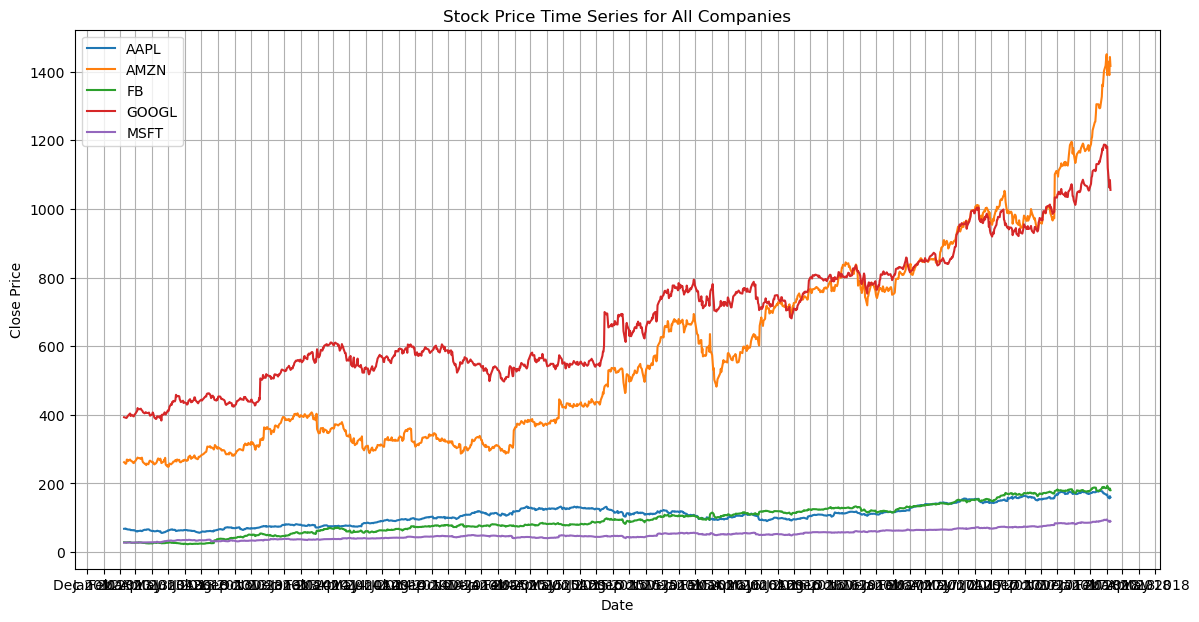

In [51]:
import matplotlib.dates as mdates
# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Set the x-axis to show all months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)
plt.show()

ValueError: Could not convert object to NumPy timedelta

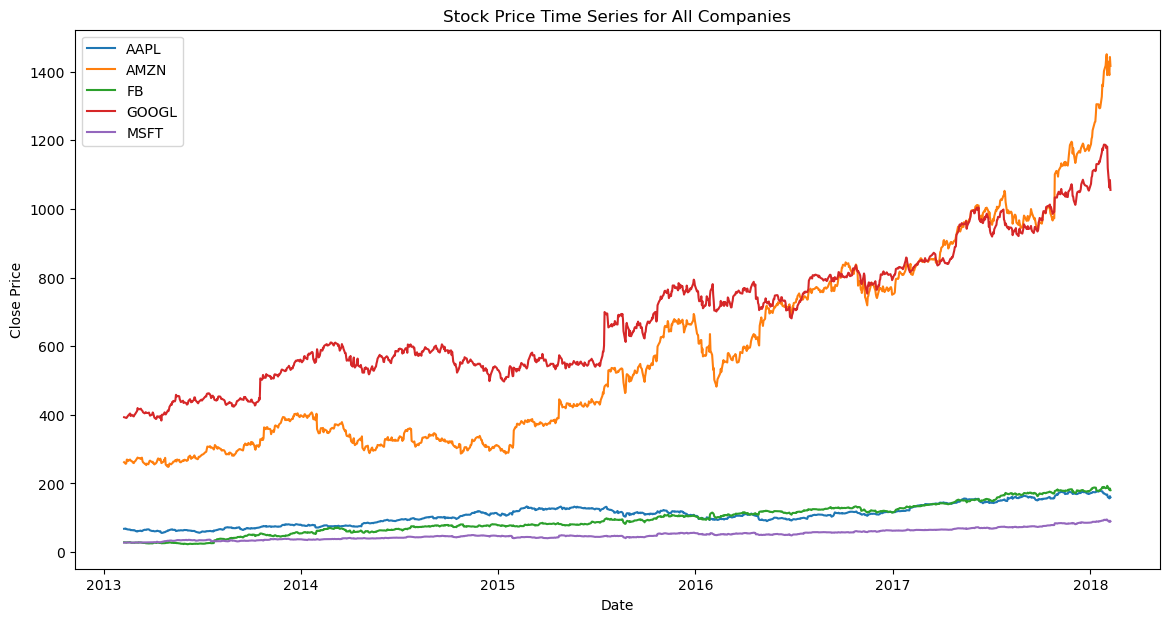

In [54]:

# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Set the x-axis ticks to show all months
plt.xticks(np.arange(df.index.min(), df.index.max(), pd.DateOffset(months=1)), rotation=45)

plt.grid(True)
plt.show()

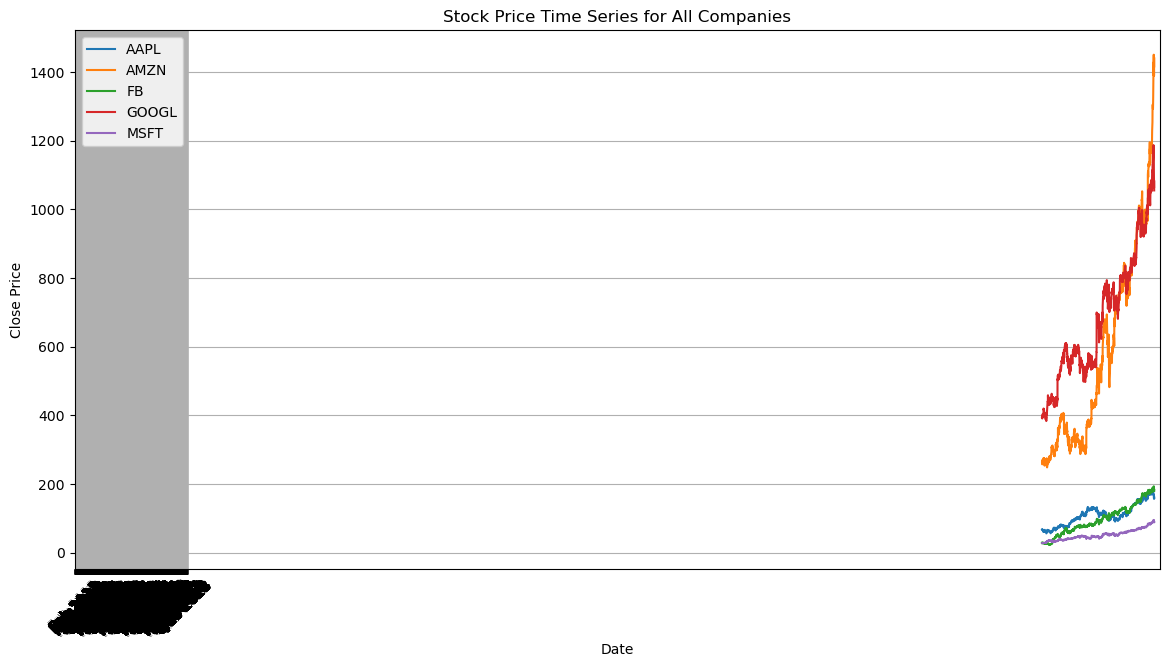

In [ ]:
# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Convert datetime index to integer (number of days since the minimum date)
date_int = (df.index - df.index.min()).days

# Set the x-axis ticks to show all months
plt.xticks(date_int, df.index.strftime('%b %Y'), rotation=45)

plt.grid(True)
plt.show()

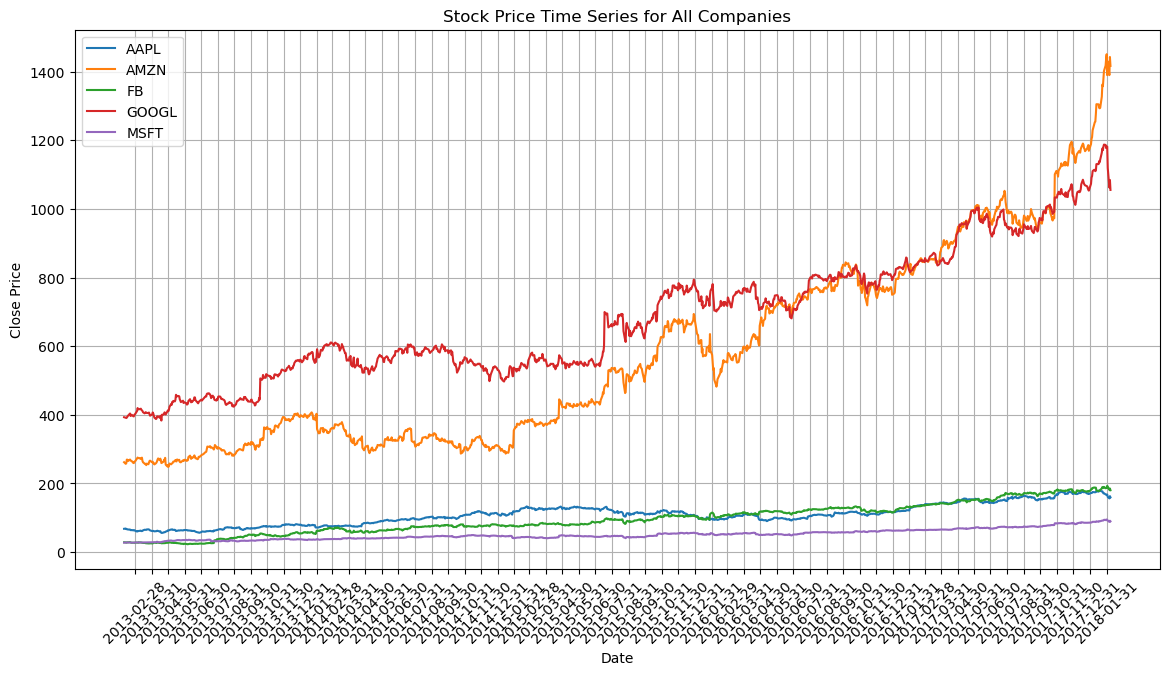

In [55]:
# Load the data
df = pd.read_csv('stockprices.csv')

# Convert 'date' column from object to datetime (assuming it's in yyyy-mm-dd format)
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as index
df.set_index('date', inplace=True)

# Get a list of all unique company names
companies = df['Name'].unique()

# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Set the x-axis ticks to show all months
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='M'), rotation=45)

plt.grid(True)
plt.show()

C:\Users\sthaa\AppData\Local\Temp\ipykernel_1664\2131847038.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tick_labels = df.resample('M').mean().index.strftime('%b %Y').tolist()


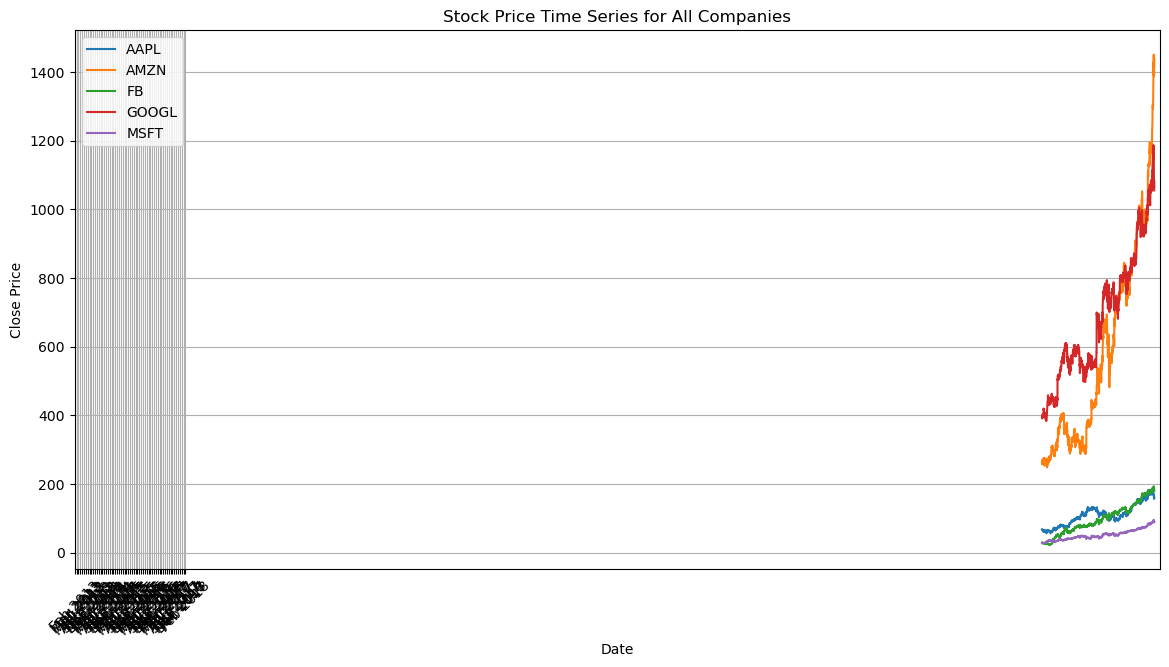

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('stockprices.csv')

# Convert 'date' column from object to datetime (assuming it's in yyyy-mm-dd format)
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as index
df.set_index('date', inplace=True)

# Get a list of all unique company names
companies = df['Name'].unique()

# Initialize a plot
plt.figure(figsize=(14, 7))

# Plot the closing price for each company
for company in companies:
    df_company = df[df['Name'] == company]
    plt.plot(df_company.index, df_company['close'], label=company)

# Customize the plot
plt.title('Stock Price Time Series for All Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Convert datetime index to integer (number of days since the minimum date)
date_int = (df.index - df.index.min()).days

# Set the x-axis ticks using np.arange
tick_locations = np.arange(date_int.min(), date_int.max(), step=30)
tick_labels = df.resample('M').mean().index.strftime('%b %Y').tolist()

plt.xticks(tick_locations, tick_labels, rotation=45)

plt.grid(True)
plt.show()


In [58]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
df = pd.read_csv('stockprices.csv')

# Convert 'date' column from object to datetime (assuming it's in yyyy-mm-dd format)
df['date'] = pd.to_datetime(df['date'])

# Get a list of all unique company names
companies = df['Name'].unique()

# Create traces for each company
traces = []
for company in companies:
    company_data = df[df['Name'] == company]
    trace = go.Scatter(x=company_data['date'], y=company_data['close'], mode='lines', name=company)
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Stock Price Time Series for All Companies',
    xaxis=dict(title='Date', type='date'),
    yaxis=dict(title='Close Price'),
    showlegend=True,
    legend=dict(orientation='h', x=0, y=1.1),
    hovermode='x',  # Set hover mode to display information vertically
    margin=dict(l=40, r=40, t=40, b=40),  # Add margin for better visibility
    autosize=True,  # Automatically adjust size based on content
    hoverdistance=100,  # Set the distance at which hover labels appear
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()